In [3]:
import numpy as np
import math

In [4]:
def euclid_dist(a,b):
    """
    Takes two vectors a and b of equal length.
    Outputs the Euclidean distance between a and b. 
    """
    
    sq_dist = 0
    l = a.size
    
    for i in range(l):
        sq_dist += (a[i] - b[i])**2
    
    e_dist = np.sqrt(sq_dist)
    return e_dist
    

In [5]:
a = np.array([2,1,1])
b = np.array([1,1,1])
print(euclid_dist(a,b))

1.0


In [6]:
def knn(sample, xtrain, ytrain, n):
    """
     Input

     Sample: a 1*c array where c is equal to the number of features in the given dataset.
     xtrain: a d*c array where d is equal to the number of training samples.
     ytrain: a 1*d array containg all the lables for xtrain.
     n: The number of nearest neighbours that predictions are made from
     
     Output
     
     The predicted label for sample using the knn method given the training dataset and n.

    """
    ###  Calculate euclidian distance between sample and all samples in xtrain.

    l = np.size(ytrain)
    euclid = np.zeros(l)
    for i in range(l):
        euclid[i] = euclid_dist(sample,xtrain[i])
        
    ###  Check if n = 1. If n = 1 then unnecessary code my be bypassed increasing computational effciency.
    if n == 1:
        index_min = np.argmin(euclid)
        pred = ytrain[index_min]
    else:
        ###  Compute the neareat n lables to sample and output most common as prediction.
        near_lab = np.zeros(n,dtype = int)
        
        for j in range(n):
            #Find min euclid distance, then find its label, then min euclid distance with inf. Reapeat process to find n 
            #nearest lables. 
            near_lab_index = np.argmin(euclid)
            near_lab[j] = ytrain[near_lab_index]
            euclid[near_lab_index] = math.inf
        
        ### Now find the mode of nearest labels to obtain prediction
        vals, counts = np.unique(near_lab, return_counts=True)
        mode_value = np.argwhere(counts == np.max(counts))
        mode = vals[mode_value]
        
        ### Sometimes there may be more than 1 modes. This if else statments deals with this by assigning a mode randomly to 
        ### predict if there are.
        
        if np.size(mode) == 1:
            pred = mode
        else:
            rand = np.random.randint(np.size(mode))
            pred = np.array([mode[rand]])
        ###Extract single value from array 
        pred = pred[0,0]
    
    return pred 
        
        
       
        

In [7]:
def conformal_predictor(sample, xtrain, ytrain):
    """
     Input

     Sample: a 1*c array where c is equal to the number of features in the given dataset.
     xtrain: a d*c array where d is equal to the number of training samples.
     ytrain: a 1*d array containg all the lables for xtrain.
     
     Output 
     
     p-values and averge false p-values
    """
    ### Concatenate sample and xtrain
    full_sample = xtrain.copy()
    full_sample = np.append(xtrain, [sample], axis = 0)
    ###Find all the unique labels 
    uniq_lab = np.unique(ytrain)
    
    ###Array to store p-values 
    p_value = np.zeros(uniq_lab.size)
    
    ###Variable to store label index
    label_index = 0 
    
    for label in uniq_lab:
        full_label = ytrain.copy()
        full_label = np.append(full_label,label)
        full_label = np.array([full_label])
        full_s_l = np.concatenate((full_sample,full_label.T),axis = 1)
        conformity_score = np.zeros(full_label.size)
        #### find distances
        for i in range(full_label.size):
            current_sample = full_sample[i]
            current_label = full_label[0,i]
        ### distance to neareast sample where class is diffrent to current label
        ### first find all samples that are of a different class
        
            diff_full_s_l = full_s_l[full_s_l[:,-1] != current_label]
            samples_different = diff_full_s_l[:,:-1]
            
        ### compute all ditances between cuurent sample and samples of a different class 
            dist_diff = np.zeros(samples_different.shape[0])
            for j in range(samples_different.shape[0]):
                dist_diff[j] = euclid_dist(current_sample, samples_different[j])
            
        ### find distance of closest sample of a different class 
            close_diff = np.min(dist_diff)
            
        ### Now find all the samples of the same class as current label
            same_full_s_l = full_s_l[full_s_l[:,-1] == current_label]
            samples_same = same_full_s_l[:,:-1]
            
        ### compute all distances between current sample and samples of the same class  
            dist_same = np.zeros(samples_same.shape[0])
            for z in range(samples_same.shape[0]):
                dist_same[z] = euclid_dist(current_sample, samples_same[z])
            
        
        ### find distance of closest sample of same class 
            close_same = np.min(dist_same[dist_same != 0])
            
        ### with distance to closest sample of nearest and furthest class now calculated the corresponding conformity score
        ### can be calculated 
            conformity_score[i] = close_diff/close_same
        
    ### Now calculate p value for the postulated label
        rank = 0
        for n in range(conformity_score.size):
            if conformity_score[-1] >= conformity_score[n]:
                rank = rank + 1
        p_value[label_index] = rank/conformity_score.size
        #print('The current label is ' + str(label))
        #print('The p_values is: ' + str(p_value[label_index]))
        label_index += 1 
        
    return (list(p_value))

            

In [27]:
###testing conformal preictor and knn on lecture example.

x_train = np.array([[0,3],[2,2],[3,3],[-1,1],[-1,-1],[0,1]])
y_train = np.array([1,1,1,-1,-1,-1])
s = np.array([2,3])

print('The predicted label for x based on 1NN is: ', knn(s, x_train, y_train, 1))

print('The p-values are: ' ,conformal_predictor(s,x_train,y_train))


The predicted label for x based on 1NN is:  1
The p-values are:  [0.14285714285714285, 0.8571428571428571]


In [25]:
from sklearn.datasets import load_iris 
iris = load_iris()
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=211)

##Get the shapes of X_train, X_test, y_train and y_test. This will be useful information in latter analysis 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [9]:
#Error rate for 1 nearsest neighbour
prediction = np.zeros(X_test.shape[0],dtype = int)
for i in range(X_test.shape[0]):
    prediction[i] = knn(X_test[i], X_train, y_train, 1)

error_rate =  1 - np.mean(prediction == y_test)

print('The error rate for the test set is ' + str(error_rate) + '.')
##Error rate given as 0% suggesting that 1NN is good algorithm for clasifying different IRIS types. Although the true test 
## error rate is likely higher than 0.0 as the test set used was relativally small cointaing only 38 samples.

The error rate for the test set is 0.0.


In [10]:
#Error rates up to 10 nearest neighbours 
error_rate2 = np.zeros(10)
    
for j in range(error_rate2.size):
    
    prediction2 = np.zeros(X_test.shape[0],dtype = int)
    
    for i in range(X_test.shape[0]):
        prediction2[i] = knn(X_test[i], X_train, y_train, j+1)

    error_rate2[j] =  1 - np.mean(prediction2 == y_test)

print(error_rate2)
#Given the error rate is zero for 1NN I don't expect much difference for K > 1. The results seem to enforce my expectation with 
#all error rates = 0, with the expecation of K = 8 containing only 1 misprediction as 1/38 = 0.0263. 
#A test set is needed to gain a better understanding of the optimal K to to fit the model with. 

[0.         0.         0.         0.         0.         0.
 0.         0.02631579 0.         0.        ]


In [11]:
#get p-values for 1NN conformal predictor for every sample in the X_test set.
import time 
start = time.time()

p_vals = list(np.zeros([X_test.shape[0]]))

for i in range(len(p_vals)):
    p_vals[i] = conformal_predictor(X_test[i], X_train, y_train)

print(time.time() - start, 'seconds')
#As can be seen here the conformal predictor for 1NN takes a relatively long time to run over the the whole of x_train 
#so effecinecy improvements are likely possible.

15.729015350341797 seconds


In [12]:
### Here the p_values for all possible labels for every sample in X_test is printed.   

print(p_vals)

[[0.008849557522123894, 0.46017699115044247, 0.008849557522123894], [0.017699115044247787, 0.017699115044247787, 0.10619469026548672], [0.8053097345132744, 0.008849557522123894, 0.008849557522123894], [0.6902654867256637, 0.008849557522123894, 0.008849557522123894], [0.008849557522123894, 0.6460176991150443, 0.008849557522123894], [0.7079646017699115, 0.008849557522123894, 0.008849557522123894], [0.008849557522123894, 0.3008849557522124, 0.017699115044247787], [0.008849557522123894, 0.24778761061946902, 0.017699115044247787], [0.008849557522123894, 0.008849557522123894, 0.7168141592920354], [0.008849557522123894, 0.008849557522123894, 0.49557522123893805], [0.8495575221238938, 0.008849557522123894, 0.008849557522123894], [0.6902654867256637, 0.008849557522123894, 0.008849557522123894], [0.008849557522123894, 0.008849557522123894, 0.7522123893805309], [0.008849557522123894, 0.008849557522123894, 0.45132743362831856], [0.008849557522123894, 0.46017699115044247, 0.008849557522123894], [0.

In [11]:
#Get average false p-value from the p value calculated in the above cells.
unique_labels = np.unique(y_train)
false_p_vals = np.zeros(y_test.size)

for i in range(y_test.size):
    # Find the label of the sample and then find the p-values which don't have the particular label.
    lab_of_index = y_test[i]
    samp_of_index_p = p_vals[i]
    diff_lab = unique_labels[unique_labels != lab_of_index]
    not_lab_p1 = samp_of_index_p[diff_lab[0]]
    not_lab_p2 = samp_of_index_p[diff_lab[1]]
    false_p_vals[i] = (not_lab_p1 + not_lab_p2)/2

# Find the avergae of all the false p values 
avg_false_p_value = np.mean(false_p_vals)

print('The average false p_value is ' + str(avg_false_p_value) + '.')

#The average false p_value is given as 0.0101304. The lowest possible false p value, where all 'false' labels are least 
#conforming is 1/(n + 1) = 1/(112 + 1) = 0.008850 where n is the sample size of xtrain. Give the average false p value is 
#near to the lowest possible p value we consider the model to fit the test data very well.

The average false p_value is 0.010130414531904984.


In [24]:
#load in the ionosphere data and split
X = np.genfromtxt("ionosphere.txt", delimiter=",")
y = np.genfromtxt("ionosphere.txt", delimiter=",",
usecols=34, dtype='int')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 211)

##Get the shapes of X_train, X_test, y_train and y_test. This will be useful information in latter analysis 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(263, 35)
(88, 35)
(263,)
(88,)


In [16]:
#Error rate for 1 nearest neighbour
prediction = np.zeros(X_test.shape[0],dtype = int)
for i in range(X_test.shape[0]):
    prediction[i] = knn(X_test[i], X_train, y_train, 1)

error_rate =  1 - np.mean(prediction == y_test)

print('The error rate for the test set is ' + str(error_rate) + '.')
### The error rate for the lest set is around 0.03409. This suggests that the model will make incorrect predictions on unseen
## data approximatly 3.4% of the time. So, 3 labels were predicted incorrectly as 3/88 = 0.03408.
## This suggests the 1NN model is a relativally good fit. 

The error rate for the test set is 0.03409090909090906.


In [17]:
#Error rates up to 10 nearest neighbours 
error_rate2 = np.zeros(10)
    
for j in range(error_rate2.size):
    
    prediction2 = np.zeros(X_test.shape[0],dtype = int)
    
    for i in range(X_test.shape[0]):
        prediction2[i] = knn(X_test[i], X_train, y_train, j+1)

    error_rate2[j] =  1 - np.mean(prediction2 == y_test)

print(error_rate2)
#Here unlike the iris data set we have p values for all k so an idea of the optimal k can be obtained. This will be done
#via a plot in the next cell

[0.03409091 0.02272727 0.02272727 0.04545455 0.04545455 0.03409091
 0.04545455 0.06818182 0.07954545 0.07954545]


Text(0, 0.5, 'Error rate')

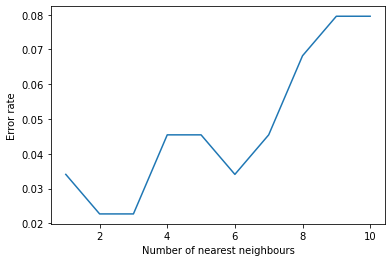

In [19]:
import matplotlib.pyplot as plt
plt.plot(np.arange(10)+1,error_rate2)
plt.xlabel('Number of nearest neighbours')
plt.ylabel('Error rate')

#The Lowest error rate seems to occur in K = [2,3] suggestting that the optimal k is in that range. It most also be noted that
#the plot dosen't contain a nice smooth U-shape expected. This is due to test set not being large enough to smoth out all the
#'noise' in the data. So, the prediction for optimal K may not be entirely correct. To overcome this a lrager dataset and/or
#cross validation should be used. 

In [20]:
#get p-values for the X_train set
start = time.time()

p_vals = list(np.zeros([X_test.shape[0]]))

for i in range(len(p_vals)):
    p_vals[i] = conformal_predictor(X_test[i], X_train, y_train)
    print(p_vals[i])

print(time.time() - start, 'seconds')
###As can be seen from my output obtaining p values for all labels for all samples in X_test takes a long time (around 5mins). 
###This is understandable given the large number of features however there is likely still much room for efficency improvements.

[0.10606060606060606, 0.007575757575757576]
[0.003787878787878788, 0.4090909090909091]
[0.25, 0.003787878787878788]
[0.003787878787878788, 0.9545454545454546]
[0.16666666666666666, 0.003787878787878788]
[0.003787878787878788, 0.3712121212121212]
[0.03409090909090909, 0.007575757575757576]
[0.003787878787878788, 0.8712121212121212]
[0.003787878787878788, 0.9734848484848485]
[0.003787878787878788, 0.5795454545454546]
[0.11742424242424243, 0.003787878787878788]
[0.2765151515151515, 0.003787878787878788]
[0.003787878787878788, 0.4734848484848485]
[0.2727272727272727, 0.003787878787878788]
[0.003787878787878788, 0.3939393939393939]
[0.003787878787878788, 0.3560606060606061]
[0.07954545454545454, 0.003787878787878788]
[0.2727272727272727, 0.003787878787878788]
[0.003787878787878788, 0.5454545454545454]
[0.8257575757575758, 0.003787878787878788]
[0.003787878787878788, 0.5454545454545454]
[0.003787878787878788, 0.8068181818181818]
[0.13636363636363635, 0.003787878787878788]
[0.0037878787878787

In [21]:
#Get false p-value 
unique_labels = np.unique(y_train)
false_p_vals = np.zeros(y_test.size)

for i in range(y_test.size):
    lab_of_index = y_test[i]
    samp_of_index_p = p_vals[i]
    diff_lab = unique_labels[unique_labels != lab_of_index]
    if diff_lab == -1:
        false_p_vals[i] = samp_of_index_p[0]
    else:
        false_p_vals[i] = samp_of_index_p[1]

avg_false_p_value = np.mean(false_p_vals)

print('The average false p_value is ' + str(avg_false_p_value) + '.')

#The average false p value is approximatly 0.004864. The lowest possible p value is 1/(n +1) = 1/(263 + 1) = 0.003788 (4sf). 
# Given the average false p value is near to lowest possible p value, the 1NN model can be seen as a good fit for the 
#ionoshpere dataset. 

The average false p_value is 0.004863980716253442.
